In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.

In [14]:
most_current_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_current_date = str(most_current_date)[2:-3]
print(most_current_date)

2017-08-23


In [15]:
year_from_current = str(eval(most_current_date[0:4])-1) + most_current_date[4:]
print(year_from_current)

2016-08-23


In [16]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_from_current).filter(Measurement.date <= most_current_date).order_by(Measurement.date).all()
last_12_prcp_df = pd.DataFrame(data=last_12_prcp)
last_12_prcp_df.columns = ['0', '1']
last_12_prcp_df.rename(columns={'0':'date'}, inplace=True)
last_12_prcp_df.rename(columns={'1':'precipitation'}, inplace=True)
last_12_prcp_df.set_index('date', inplace =True)
last_12_prcp_df.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


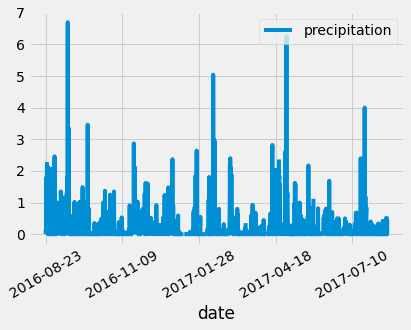

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data & Rotate the xticks for the dates
last_12_prcp_df.plot()
plt.legend(loc=1)
plt.savefig("Images/precipitation_bargraph.png")
plt.xticks(rotation=30) 
plt.show()



In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_prcp_df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(func.count(Station.station))
station_count = stations[0]
station_count

(9,)

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs))\
.group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())

for station in active_stations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]
stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), 
                      func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station)

stats_list=list(stats)
print(stats_list)

[(54.0, 85.0, 71.66378066378067)]


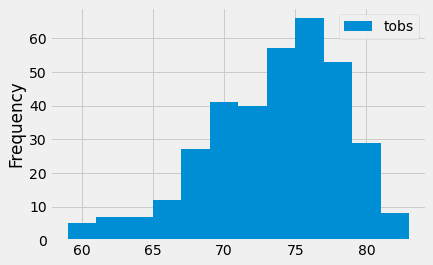

<Figure size 432x288 with 0 Axes>

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs = session.query(Measurement.tobs)\
.filter(Measurement.date >= year_from_current)\
.filter(Measurement.date <= most_current_date)\
.filter(Measurement.station == most_active_station)\

tobs_list = []
for tob in tobs:
    tobs_list.append(tob[0])
fig = plt.figure()
plt.hist(tobs_list, bins=12, label='tobs')
plt.ylabel('Frequency')
plt.legend(loc=1)
plt.show()
plt.savefig('Images/station_histogram.png')


# Close session

In [ ]:
# Close Session
session.close()